In [1]:
import numpy as nu
import matplotlib.pyplot as plt
from galpy.potential import SCFPotential, HernquistPotential, NFWPotential, compute_coeffs_spherical,compute_coeffs_axi, compute_coeffs
from galpy.potential import FlattenedPowerPotential
from IPython.display import display, Math, Latex
from galpy.util.bovy_coords import cyl_to_spher, spher_to_cyl
%matplotlib inline  


In [2]:
h = HernquistPotential(amp=1, a=1)
nfw = NFWPotential(amp=1, a=1)

def rho_Spherical(R, z=0, phi=0.):
    return h.dens(R,z)

def rho_NFW(R, z=0, phi=0):
    return nfw.dens(R, z)

In [3]:
Acos, Asin = compute_coeffs_spherical(rho_Spherical,2, 1.)
scf = SCFPotential(Acos=Acos,Asin=Asin)

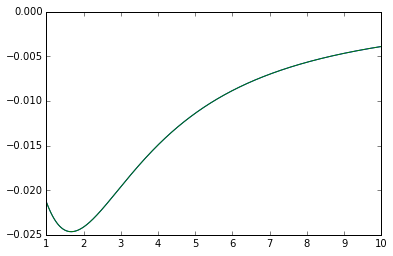

In [4]:
R = nu.linspace(1.,10,1000)
plt.plot(R, scf.Rforce(R,2,1))
plt.plot(R, h.Rforce(R, 2, 1))

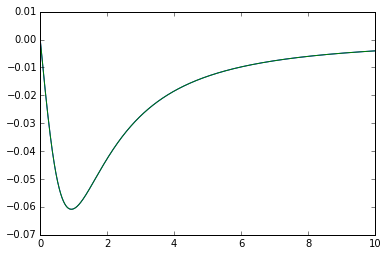

In [5]:
z = nu.linspace(0.,10,1000)
plt.plot(z, scf.zforce(1,z,1))
plt.plot(z, h.zforce(1, z, 1))

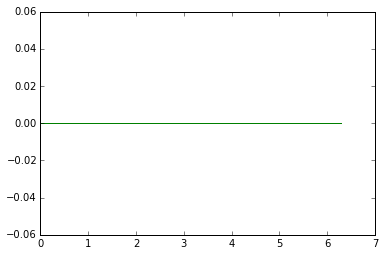

In [6]:
phi = nu.linspace(0, 2*nu.pi,1000)
plt.plot(phi, scf.phiforce(2.,1.,phi))
plt.plot(phi, h.phiforce(2., 1., phi)*nu.ones((1000))) ## h._phiforce(2., 1., phi) returns a float even though phi is an array

In [7]:
from galpy.orbit import Orbit
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1])

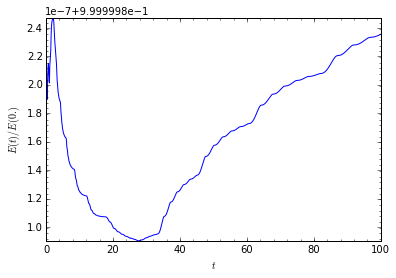

In [8]:
ts= nu.linspace(0,100,1000)
o.integrate(ts,scf,method='odeint')
o.plotE(normed=True)

In [9]:
Acos, Asin = compute_coeffs_spherical(rho_NFW,200, 1.)
scf = SCFPotential(Acos=Acos,Asin=Asin)


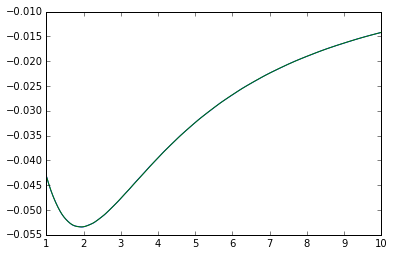

In [10]:
plt.plot(R, scf.Rforce(R,2,1))
plt.plot(R, nfw.Rforce(R, 2, 1))

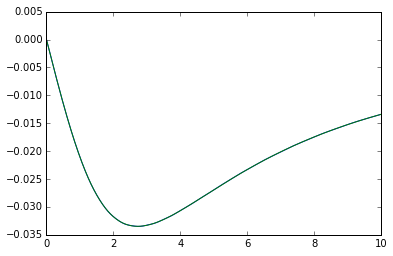

In [11]:
plt.plot(z, scf.zforce(3,z,1))
plt.plot(z, nfw.zforce(3, z, 1))

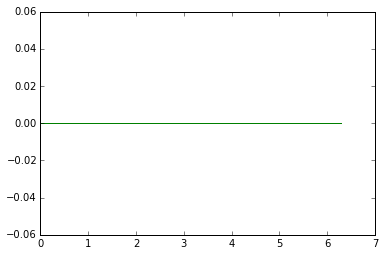

In [12]:
plt.plot(phi, scf.phiforce(2,2,phi))
plt.plot(phi, nfw.phiforce(2, 2, phi)*nu.ones((1000)))

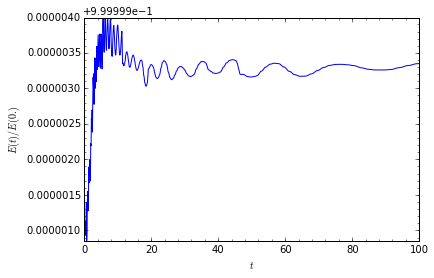

In [13]:
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1])
o.integrate(ts,scf,method='odeint')
o.plotE(normed=True)

In [14]:
fp = FlattenedPowerPotential()

In [15]:
Acos, Asin = compute_coeffs_axi(fp.dens,30, 30)
scf = SCFPotential(Acos=Acos,Asin=Asin)

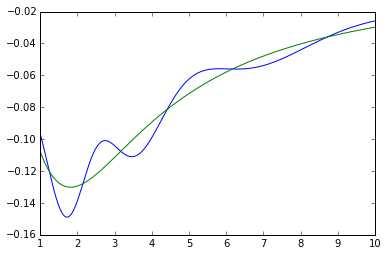

In [16]:
plt.plot(R, scf.Rforce(R,2,1))
plt.plot(R, fp.Rforce(R, 2, 1))

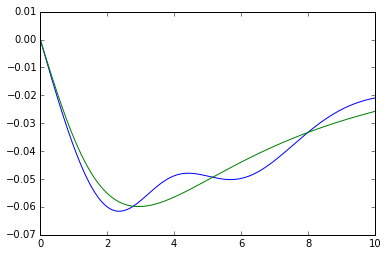

In [17]:
plt.plot(z, scf.zforce(4,z,1))
plt.plot(z, fp.zforce(4, z, 1))

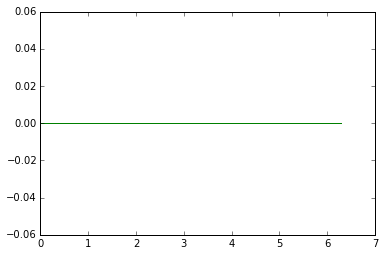

In [18]:
plt.plot(phi, scf.phiforce(1,2,phi))
plt.plot(phi, fp.phiforce(1, 2, phi)*nu.ones((1000)))

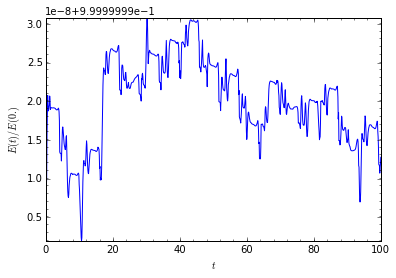

In [19]:
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1])
o.integrate(ts,scf,method='odeint')
o.plotE(normed=True)

In [20]:
def density1(R, z=0, phi=0.):
    spherical_coords = cyl_to_spher(R,z, phi)
    r, theta, phi = spherical_coords
    h = HernquistPotential(2)
    return h.dens(R, z, phi)*(1 + eps*nu.cos(theta) + eps*nu.cos(theta)**2.)*(1 + eps*nu.cos(phi) + eps*nu.sin(phi))

In [25]:
eps = 1.
Acos, Asin = compute_coeffs(density1,10, 10)
scf = SCFPotential(Acos=Acos,Asin=Asin)

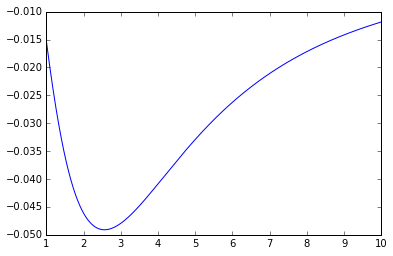

In [27]:
plt.plot(R, scf.Rforce(R,3,0))

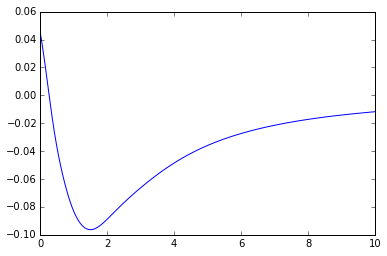

In [28]:
plt.plot(z, scf.zforce(1,z,nu.pi))

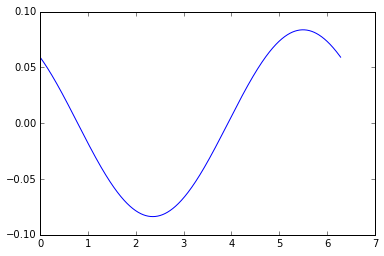

In [29]:
plt.plot(phi, scf.phiforce(1,2, phi))

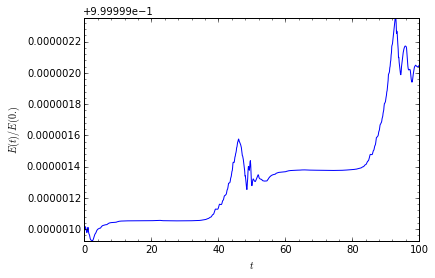

In [26]:
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1])
o.integrate(ts,scf,method='odeint')
o.plotE(normed=True)